#### CEMFI Lectures on Trade and Distributional Effects: Exploration of the ADH data.

Still rough...

The want operator: Two things:

- Discuss some of the aggregate facts in the US surrounding the time periodd that ADH consider.


- Replicate aspects of the ADH paper.


- Talk through some of the things I find interesting in the ADH data that are not necessarily in the paper.

Finally, you maybe asking, what is this that the notes are in etc. It's a "jupyter notebook." If you don't know what a jupyter notebook is or what to do with them, this website is a great place to start: [https://datascience.quantecon.org/](https://datascience.quantecon.org/).

In [1]:
import pandas as pd
from pandas_datareader import data, wb # This will import the data reader
import weightedcalcs as wc
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

#fig_path = "C:\\Users\\mwaugh.NYC-STERN\\Documents\\GitHub\\tradeexposure\\figures"
#fig_path2 = "C:\\Users\\mwaugh.NYC-STERN\\Dropbox\\Random Talks\\london_exchange_2017"
# This is if I want to output the figure

C:\ProgramData\Anaconda3\lib\site-packages\linearmodels\panel\data.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Categorical, DataFrame, Index, MultiIndex, Panel, Series,


---

## Aggregate Facts

This section will focus on essentially three issues:

- **Expansion of Chinese Trade** and what we show is that essentially **all** of US trade growth since the 1990s is from the expansion of Chinese imports.


- **Expansion of the Trade Deficit** during this time period. This fact is interesting in that the idea is the US did not recive a coresponding increase in export opportunities with the rise in imports. So the conceptual leap many make is that this means we did not recive "jobs" from gains in exporting while we were lossing "jobs."


- **Fall in Real Interest Rates** Around the time the Chinese trade expanded, real interest rates fell quite dramatically. This is related to Bernanke's "Global Savings Glut" hypothesis. Expositied [here.](https://www.federalreserve.gov/boarddocs/speeches/2005/200503102/) This is an important fact to keep in mind given the discussion above. Moreover, it's also interesting to keep in mind given that we had a credit-driven housing boom and then bust during this time period.

In [2]:
codes = ["GDP", "IMPGS", "EXPGS", "IMPCH", "GS1", "CPILFESL"] 
# nomial gdp, imports, imports from china, constant maturity 1 year rate, cip (no energy or food)

fred = data.DataReader(codes,"fred",1990)  # Then for fred, you hand it the codes
                                            # Tell it you want to ask from FRED
                                            # then tell it the start date

In [3]:
display(fred.head(10))
#fred.dropna(inplace = True)

,GDP,IMPGS,EXPGS,IMPCH,GS1,CPILFESL
DATE,,,,,,
1990-01-01,5872.701,626.767,538.232,1186.1,7.92,132.1
1990-02-01,NaN,NaN,NaN,993.8,8.11,132.7
1990-03-01,NaN,NaN,NaN,931.0,8.35,133.5
1990-04-01,5960.028,614.759,545.925,996.4,8.40,134.0
1990-05-01,NaN,NaN,NaN,1173.5,8.32,134.4
1990-06-01,NaN,NaN,NaN,1317.2,8.10,135.1
1990-07-01,6015.116,630.102,555.149,1492.5,7.94,135.8
1990-08-01,NaN,NaN,NaN,1568.6,7.78,136.6
1990-09-01,NaN,NaN,NaN,1432.1,7.76,137.1


### Fact \#1:  Growth in Chines Imports Accounts for Aggregate Import Growth

First we need to get things to quarterly frequency with the china stuff...

In [4]:
china_imports = pd.DataFrame(fred["IMPCH"].resample("Q", convention= 'end').sum())

china_imports.index = china_imports.index + pd.DateOffset(days=1)

china_imports.head()

china_imports.rename(columns = {"IMPCH": "ch_imports"}, inplace = True)

trade = fred.merge(china_imports, how = "outer", left_index = True, right_index = True)

trade = trade.resample("Y", convention= 'end').sum()

trade["imports_gdp"] =  100* (trade.IMPGS / trade.GDP )

trade["ch_imports"] = 0.01*trade["ch_imports"] 

trade["frac_china"] = 100.*trade["ch_imports"] / trade["IMPGS"]

trade["china_share"] = 100.*trade["ch_imports"] / trade["GDP"]

In [5]:
trade.loc["2018-12-31"]

trade.drop(pd.to_datetime("2018-12-31"), inplace = True)

trade.head()

,GDP,IMPGS,EXPGS,IMPCH,GS1,CPILFESL,ch_imports,imports_gdp,frac_china,china_share
DATE,,,,,,,,,,
1990-12-31,23852.578,2518.910,2207.492,15237.4,94.59,1625.5,110.912,10.560326,4.403174,0.464990
1991-12-31,24632.517,2494.177,2379.722,18969.2,70.30,1705.4,173.282,10.125547,6.947462,0.703469
1992-12-31,26081.309,2671.163,2532.211,25727.5,46.67,1767.8,244.233,10.241675,9.143321,0.936429
1993-12-31,27434.234,2879.891,2619.197,31539.9,41.21,1826.4,301.245,10.497435,10.460292,1.098062
1994-12-31,29148.946,3253.697,2883.749,38786.8,63.72,1878.0,368.316,11.162314,11.319923,1.263565


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


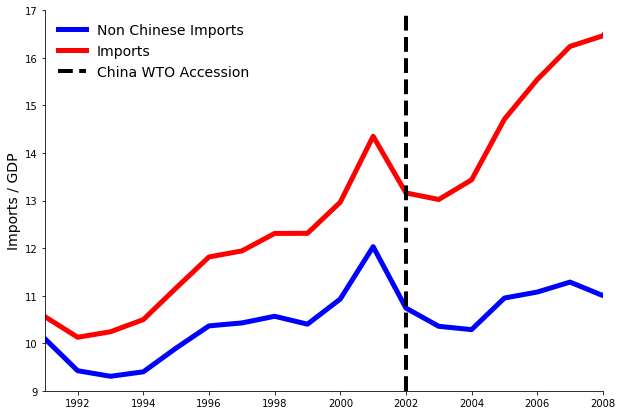

In [6]:
fig, ax = plt.subplots(figsize = (10,7))


ax.plot(trade["imports_gdp"]-trade["china_share"], color = "blue",
        linewidth = 5, label = "Non Chinese Imports")

ax.plot(trade["imports_gdp"], color = "red",
        linewidth = 5, label = "Imports")

#ax1 = ax.twinx()

#ax1.plot(trade["china_share"], color = "red", lw = 5,
#        label = "Chinese Imports")

#ax1.set_ylabel('Chinese Imports / GDP', color='r')
#ax1.tick_params('y', colors='r')

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax1.spines["top"].set_visible(False)


ax.set_ylabel("Imports / GDP", fontsize = 14)

ax.set_xlim("1991-01-01", "2008-01-01")

ax.axvline(x= "2002-01-01",           # Set the value equall to the average
           color='k',       # make the color red
           label='China WTO Accession', # this is the label (shows up in the legend)
           linestyle='--',   # the line style
           linewidth=4)     # thickness of the line

ax.set_ylim(9,17)
#ax1.set_ylim(0,7)

#ax.legend()
#|ax1.legend()

ax.legend(loc="upper left", fontsize = 14, frameon=False)

#plt.savefig(fig_path2 + "\\us_imports.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

#oxford_data = pd.DataFrame()   

#oxford_data = pd.concat([oxford_data, trade["imports_gdp"], trade["imports_gdp"]-trade["china_share"]],axis=1)

#oxford_data.to_excel('oxford_fig1.xlsx')

### Fact #2 Expanding Trade Deficit

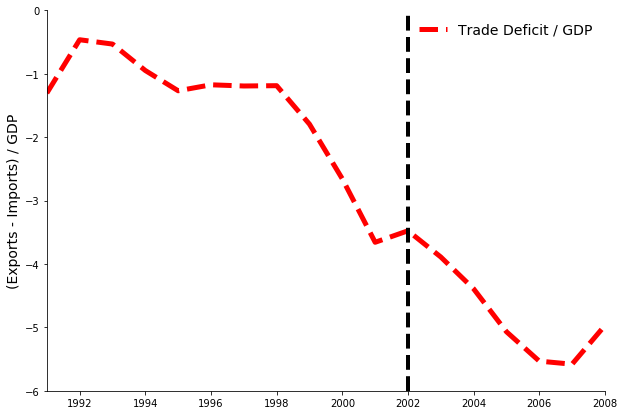

In [7]:
trade["trade_deficit"] = 100*(fred["EXPGS"] - fred["IMPGS"]).resample("Y", convention= 'end').sum()

trade["trade_deficit"] = trade["trade_deficit"]/trade["GDP"]

fig, ax = plt.subplots(figsize = (10,7))

ax.plot(trade.trade_deficit, color = "red", lw = 5,
        label = "Trade Deficit / GDP", ls = "--")

ax.set_xlim("1991-01-01", "2008-01-01")
ax.set_ylim(-6, 0)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("(Exports - Imports) / GDP", fontsize = 14) 

ax.legend(loc="upper right", fontsize = 14, frameon=False)


ax.axvline(x= "2002-01-01",           # Set the value equall to the average
           color='k',       # make the color red
           label='China WTO Accesion', # this is the label (shows up in the legend)
           linestyle='--',   # the line style
           linewidth=4)     # thickness of the line

#plt.savefig(fig_path + "\\us_trade_deficit.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

### Fact \#3 400 basis point fall in real Interest rates leading into China Expansion

In [8]:
irates = pd.DataFrame(fred["GS1"].resample("Q", convention= 'end').mean())

irates.index = irates.index + pd.DateOffset(days=1)

irates.head()

####################3

inflation = pd.DataFrame(fred["CPILFESL"].resample("Q", convention= 'end').mean())

inflation.index = inflation.index + pd.DateOffset(days=1)

irates["real"] = irates["GS1"] - 100*inflation["CPILFESL"].pct_change(4)

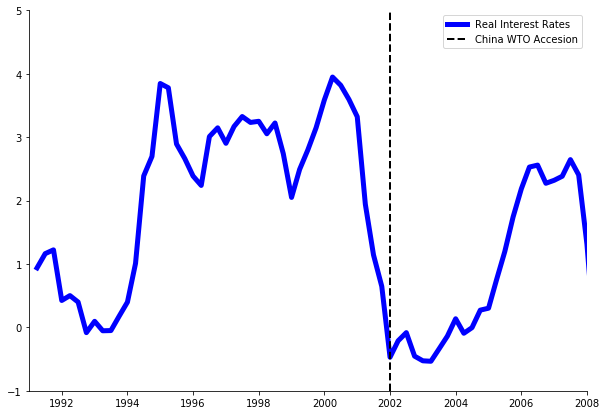

In [9]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(irates.real, color = "blue", lw = 5,
        label = "Real Interest Rates")

ax.set_xlim("1991-01-01", "2008-01-01")
ax.set_ylim(-1, 5)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.axvline(x= "2002-01-01",           # Set the value equall to the average
           color='k',       # make the color red
           label='China WTO Accesion', # this is the label (shows up in the legend)
           linestyle='--',   # the line style
           linewidth=2)     # thickness of the line

#ax1 = ax.twinx()

#ax1.plot(trade["china_share"], color = "red", lw = 5,
#        label = "Chinese Imports")

plt.legend()

plt.show()

---

### ADH Evidence

Below I discuss three key facts that we want our model to replicate from the ADH evidence.

 - **Houshold Income** in Table 9 they have changes in houshold income per adult and then broken down by income type. The closest analog to what is in out model is "wage and salary" income variable. This is the one we will focus on. Its name in the ADH data set is: ``relchg_avg_hhincwage_pc_pw`` 
 
- **Labor Supply** need to explain


- **Migration** need to explain.

**Details about timing** The timing is as follows. The start of the period is 1991 and then end is 2007. This is then divided into two periods. The first periods is 1991-2000, thus this is a 9 year time period. They convert stuff into a "comparable decadal scale" see Footnote 22. Thus, for values for this period, they multiply them by 10/9.The same issue arises for the second period which is 2000-2007. The values for this are again converted to "decadal scales" so they are multiplied by 10/7. 

The Appendix Table 2, reports the income variable and the decadal adjustments. In the summary statistics for the stuff that we care about, the ADH data is adjusted in this way described above.

### Some Housecleaning of the ADH dataset

We will read in the dataset, create an excel sheet of the variable names, grab the region dummies, and then normalize the IPW measure. This last step is important to map the model to the data.

In [10]:
df = pd.read_stata("workfile_china.dta")
# read the dataset in. This is from David Dorn's website, it has a one of information.

df["const"] = 1
# add a constant for the regression results.

####################################################################################

# There are many varibles in the dataset. Here is a way to see what is going on

var_names  = pd.DataFrame(df.columns)


var_names.to_excel("var_names.xlsx") # If you want to see what they are (like 200) this 
                                     # this is one way to do it...
    
####################################################################################

regions = list(filter(lambda x: x.startswith("reg"), df.columns))
                                    # Spencer's way to figure out regional dummies.
    
rhs_var = ["l_shind_manuf_cbp",
    "l_sh_popedu_c",
    "l_sh_popfborn",
    "l_sh_empl_f",
    "l_sh_routine33",
    "l_task_outsource"] # This grabs the main RHS varibles used in the ADH regressions

calc = wc.Calculator("l_popcount")


#### Summary statistics about Trade Exposure, Wages, Labor Supply

#### Trade Explosure

In [20]:
print("Chinese Imports per Worker 1991", 
      round(calc.mean(df.set_index("yr").loc[1990], "l_tradeusch_pw"),2))

print("Chinese Imports per Worker 2000",
      round(calc.mean(df.set_index("yr").loc[2000], "l_tradeusch_pw"),2))

#(I think) For the Level stuff, the yr 2000 means the level at the end of the 2000-20007 period. So 
# it is really the value in 2007.

Chinese Imports per Worker 1991 0.29
Chinese Imports per Worker 2000 1.08


A couple of things to notice:

- First, note that these numbers match up exactly with Appendix, Table 2. The one issue to be mindful of is the year with which the workers are being divided by. In Appendix, Table 2 there are different set of numbers reported depending upon what is picked.


- Second, notice that there is a **huge** change in import per worker in the second period. This is consistent with the aggregate facts regarding the dramatic rise in exposure over the 2000s.

#### Wages

In [23]:
print("Average Household Wage and Salary, per adult, 1990",
      round(calc.mean(df.set_index("yr").loc[1990], "d_avg_hhincwage_pc_pw"),2))

print("Average Household Wage and Salary, per adult, 2000",
      round(calc.mean(df.set_index("yr").loc[2000], "d_avg_hhincwage_pc_pw"),2),"\n")

print("Average Change in Wages 1991-2000",
      round(calc.median(df.set_index("yr").loc[1990], "relchg_avg_hhincwage_pc_pw"),2))

print("Average Change in Wages 2000 - 2007",
      round(calc.median(df.set_index("yr").loc[2000], "relchg_avg_hhincwage_pc_pw"),2))

Average Household Wage and Salary, per adult, 1990 4152.03
Average Household Wage and Salary, per adult, 2000 1703.21 

Average Change in Wages 1991-2000 18.16
Average Change in Wages 2000 - 2007 6.05


Again, these match up. Moreover, the latter line provides a benchmark comparison to try and figure out the units. The first line simply reports the average change. The latter takes the averages from ADH, grosses them up to make them decadal equivalents. Then takes the change. Note that they are close suggesting that the pct change reported in the ADH dataset are the decadal equivalents.

Key thing to notice was how slow wages changed in the second period. Is it trade? Is it something else?

### Labor Supply

In [24]:
print("Share not in labor force, 1990",
      round(calc.mean(df.set_index("yr").loc[1990], "l_sh_nilf"),2))

print("Share not in labor force, 2000",
      round(calc.mean(df.set_index("yr").loc[2000], "l_sh_nilf"),2),"\n")

Share not in labor force, 1990 24.76
Share not in labor force, 2000 26.05 



Here what we see is that the labor force **non participation** increased in this time period. So less people were working than before. 

---
### Household Wage Income Results...

I first want to plot this and cut it by the time period. ADH main results stack two time periods 90s and 2000s. The 2000s correspond with the big rise in Chinese trade; the 1990s is far less dramatic. 

#### The plot test

Lets simply plot the change in IPW vs. the percent change in household "wage and salary" income per adult.

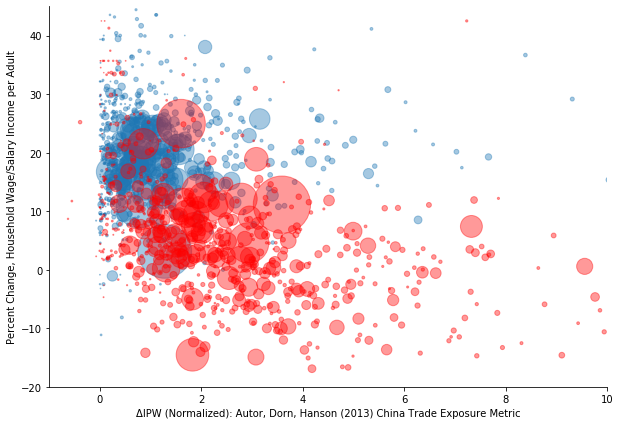

In [25]:
fig, ax = plt.subplots(figsize = (10,7))

year = "1990"

#df["norm_IPW"]

ax.scatter(df.set_index("yr").loc[int(year)].d_tradeusch_pw, #X variables
           df.set_index("yr").loc[int(year)].relchg_avg_hhincwage_pc_pw,     # y variables 
            s = 0.0002*df.set_index("yr").loc[int(year)].l_popcount,
            alpha = 0.40) 

year = "2000"

ax.scatter(df.set_index("yr").loc[int(year)].d_tradeusch_pw, #X variables
           df.set_index("yr").loc[int(year)].relchg_avg_hhincwage_pc_pw,     # y variables 
           s = 0.0002*df.set_index("yr").loc[int(year)].l_popcount,
            alpha = 0.40, color = "red") 

ax.set_ylabel("Percent Change, Household Wage/Salary Income per Adult") 
ax.set_xlabel("ΔIPW (Normalized): Autor, Dorn, Hanson (2013) China Trade Exposure Metric")

ax.set_xlim(-1,10)
ax.set_ylim(-20,45)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#plt.savefig(fig_path + "\\adh_data_wage_change.pdf", bbox_inches="tight", dpi = 1200)


#plt.legend()

plt.show()

This is quite interesting. What do I see:

- First you see how there is far more variation in trade exposure for the 2000s (red) periods vs. the 90s (blue). China came in and **fundamentally altered a commute zones exposure to trade by large amounts** 


- If you eye-ball this enough, for the 90s, **there is essentially zero correlation between income growth and trade exposure during this time period.** If anything, it is slightly positive.


- If you look at the 2000s (red), two things are going on. First, wage growth is lower overall. Second, there is **MAYBE** a "hockey stick" pattern between wage growth and trade exposure.


- Finally, a better characterization of the data is this (i) in 1990's, there is no relationship and (ii) in the 2000's the average growth rate of wages fell, but variance when up a bunch (and there is no relationship wither within the 2000's). But what we have is two clusters: the 1990s with low exposure, high wages and then another cluster with high exposure, low wages. Then you get a negative slope? 

#### Now this is the specification that will replicate Table 9 in ADH

In [26]:
###############################################################################
# Then this does the specification that will replicate ADH...
rhs_var = ["l_shind_manuf_cbp",
    "l_sh_popedu_c",
    "l_sh_popfborn",
    "l_sh_empl_f",
    "l_sh_routine33",
    "l_task_outsource"]

rhs_var.append("t2")

reg_df = df
    
res_first = IV2SLS(reg_df.relchg_avg_hhincwage_pc_pw, 
                   reg_df[["const"]+ rhs_var + regions],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])

print(res_first)

                              IV-2SLS Estimation Summary                              
Dep. Variable:     relchg_avg_hhincwage_pc_pw   R-squared:                      0.4278
Estimator:                            IV-2SLS   Adj. R-squared:                 0.4214
No. Observations:                        1444   F-statistic:                    735.75
Date:                        Mon, Oct 21 2019   P-value (F-stat)                0.0000
Time:                                04:53:33   Distribution:                 chi2(16)
Cov. Estimator:                     clustered                                         
                                                                                      
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 60.679     8.9966     6.

**So the results ``-2.1416 (0.5851)`` exactly matches up with the ADH coeffecient estimate.** 

Now let's do the following and take out all the controlls and see what role the time effect and import exposure is doing during this period.

In [43]:
###############################################################################
# Then this does the specification that will replicate ADH...


reg_df = df
    
res_first = IV2SLS(reg_df.relchg_avg_hhincwage_pc_pw, 
                   reg_df[["const", "t2"]],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])

print(res_first)

                              IV-2SLS Estimation Summary                              
Dep. Variable:     relchg_avg_hhincwage_pc_pw   R-squared:                      0.3739
Estimator:                            IV-2SLS   Adj. R-squared:                 0.3730
No. Observations:                        1444   F-statistic:                    42.965
Date:                        Mon, Oct 21 2019   P-value (F-stat)                0.0000
Time:                                04:59:48   Distribution:                  chi2(2)
Cov. Estimator:                     clustered                                         
                                                                                      
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
const              20.106     1.3006     15.459     0.0

In [ ]:
###############################################################################
# Then this does the specification that will replicate ADH...
rhs_var = ["l_shind_manuf_cbp",
    "l_sh_popedu_c",
    "l_sh_popfborn",
    "l_sh_empl_f",
    "l_sh_routine33",
    "l_task_outsource"]

rhs_var.append("t2")

reg_df = df
    
res_first = IV2SLS(reg_df.d_avg_lnwk, 
                   reg_df[["const"]+ rhs_var + regions],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])

print(res_first)

---
### Labor Supply Results...

Same deal as above. First plot it, then replicate ADH, then our normalized measure. 

#### The plot test

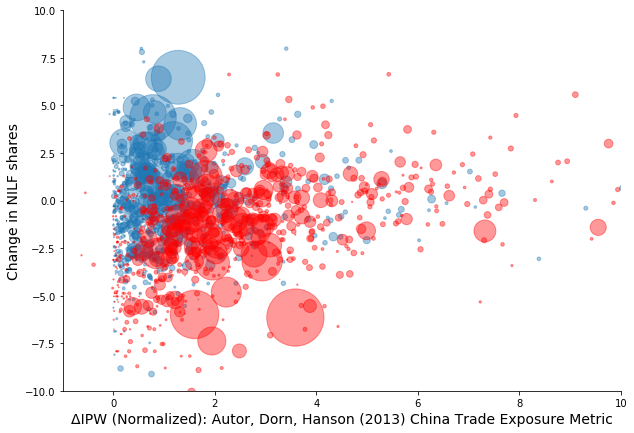

In [44]:
fig, ax = plt.subplots(figsize = (10,7))

year = "1990"

#df["norm_IPW"]

ax.scatter(df.set_index("yr").loc[int(year)].d_tradeusch_pw, #X variables
           df.set_index("yr").loc[int(year)].d_sh_nilf,     # y variables 
            s = 0.0002*df.set_index("yr").loc[int(year)].l_popcount,
            alpha = 0.40) 

year = "2000"

ax.scatter(df.set_index("yr").loc[int(year)].d_tradeusch_pw, #X variables
           df.set_index("yr").loc[int(year)].d_sh_nilf,     # y variables 
           s = 0.0002*df.set_index("yr").loc[int(year)].l_popcount,
            alpha = 0.40, color = "red") 

ax.set_ylabel("Change in NILF shares", fontsize = 14) 
ax.set_xlabel("ΔIPW (Normalized): Autor, Dorn, Hanson (2013) China Trade Exposure Metric", fontsize = 14) 

ax.set_xlim(-1,10)
ax.set_ylim(-10,10)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#plt.savefig(fig_path + "\\adh_data_wage_change.pdf", bbox_inches="tight", dpi = 1200)

#plt.savefig("nilf_trade_exposure.pdf", bbox_inches = "tight", dip = 1200)
#plt.savefig(fig_path2 + "\\adh_data_ls_change.pdf", bbox_inches="tight", dpi = 3600)
plt.show()

Same story as above, not much relationship for 1990s. Then a clear positive relationship emerges for the 2000s period. This means that CMZ's with higher trade exposure had increases in the share of the working age population not in the labor force.

In [46]:
###############################################################################
# Then this does the specification that will replicate ADH...
rhs_var = ["l_shind_manuf_cbp",
    "l_sh_popedu_c",
    "l_sh_popfborn",
    "l_sh_empl_f",
    "l_sh_routine33",
    "l_task_outsource"]

rhs_var.append("t2")

reg_df = df

res_first = IV2SLS(reg_df.d_sh_nilf, 
                   reg_df[["const"]+ rhs_var + regions],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              d_sh_nilf   R-squared:                      0.3860
Estimator:                    IV-2SLS   Adj. R-squared:                 0.3792
No. Observations:                1444   F-statistic:                    462.05
Date:                Mon, Oct 21 2019   P-value (F-stat)                0.0000
Time:                        05:00:47   Distribution:                 chi2(16)
Cov. Estimator:             clustered                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                -16.749     3.6439    -4.5963     0.0000     -23.890     -9.6066
l_shind_manuf_cbp    -0.

In [47]:
res_first = IV2SLS(reg_df.d_sh_nilf, 
                   reg_df[["const"]+ ["t2"]],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              d_sh_nilf   R-squared:                      0.2566
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2556
No. Observations:                1444   F-statistic:                    54.739
Date:                Mon, Oct 21 2019   P-value (F-stat)                0.0000
Time:                        05:01:05   Distribution:                  chi2(2)
Cov. Estimator:             clustered                                         
                                                                              
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
const              0.7245     0.4802     1.5087     0.1314     -0.2167      1.6656
t2                -3.8424     0.8340

---

## Population

In [254]:
reg_df.lnchg_popworkage.describe()

count    1444.000000
mean        8.802312
std        10.405612
min       -26.372385
25%         1.959853
50%         7.840154
75%        14.125978
max        64.575134
Name: lnchg_popworkage, dtype: float64

In [171]:
res_first = IV2SLS(reg_df.lnchg_popworkage, 
                   reg_df[["const"]+ rhs_var + regions],
                   reg_df.d_tradeusch_pw, 
                   reg_df.d_tradeotch_pw_lag,
                   weights = reg_df["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:       lnchg_popworkage   R-squared:                      0.4234
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4169
No. Observations:                1444   F-statistic:                    357.08
Date:                Wed, Oct 17 2018   P-value (F-stat)                0.0000
Time:                        12:14:14   Distribution:                 chi2(16)
Cov. Estimator:             clustered                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 1.2356     10.765     0.1148     0.9086     -19.863      22.334
l_shind_manuf_cbp    -0.

This corresponds with the -0.0502 estimate under panel C table 4 of the change in working age population. 

### Greenland, Lopresti, McHenry evidence

**Step 1** Let's replicate the ADH evidence using the GLM data. This is what we will do below. 

Group by commute zone and then compute changes in population.

In [41]:
df2 = pd.read_stata("IPUMS_CZ_1664_7010_ADH.dta")

grp = df2.groupby("czone")

In [42]:
def pop_change(df):
    df.set_index("year", inplace = True)
    
    data = {'glm_chng': [100*10/7*(np.log(df.loc["2007"].pop1664) - np.log(df.loc["2000"].pop1664))],
            
           'yr': [2000],
            
           'glm_chng_lag': [100*(np.log(df.loc["2000"].pop1664) - np.log(df.loc["1990"].pop1664))]}

    data = pd.DataFrame(data)
    
    data_y2 = {'glm_chng': [100*(np.log(df.loc["2000"].pop1664) - np.log(df.loc["1990"].pop1664))],
           'yr': [1990],
            
           'glm_chng_lag': [100*(np.log(df.loc["1990"].pop1664) - np.log(df.loc["1980"].pop1664))]}
    
    data = data.append(pd.DataFrame(data_y2))
    
    
    return data
    


In [43]:
glm_data = grp.apply(pop_change)

glm_data.reset_index(inplace = True)

glm_data.drop('level_1', axis = 1, inplace = True)

glm_data.head()

,czone,glm_chng,yr,glm_chng_lag
0,100.0,2.522267,2000,9.819574
1,100.0,9.819574,1990,1.757392
2,200.0,12.988352,2000,25.652655
3,200.0,25.652655,1990,10.755048
4,301.0,1.510823,2000,4.950344


In [44]:
adh_glm = reg_df.merge(glm_data, left_on = ["czone", "yr"], right_on = ["czone", "yr"],how="inner" )

In [45]:
adh_glm.head()

,czone,statefip,city,yr,t2,timepwt48,reg_midatl,reg_encen,reg_wncen,reg_satl,...,d_tradeotchce_pw_lag,d_tradeusce_pw,d_tradeotce_pw_lag,d_tradeushi_pw,d_tradeothi_pw_lag,const,norm_IPW,demean_income,glm_chng,glm_chng_lag
0,100.0,47,undefined,1990,0,0.002114,0,0,0,0,...,2.363754,6.429653,0.084927,30.744575,8.696790,1,1.325365,-1.531569,9.819574,1.757392
1,100.0,47,undefined,2000,1,0.002067,0,0,0,0,...,9.147025,3.609548,0.178625,25.120905,64.122138,1,1.984468,-18.529659,2.522267,9.819574
2,200.0,47,undefined,1990,0,0.000732,0,0,0,0,...,2.847327,2.668147,0.049593,16.205678,3.316682,1,0.200426,-10.232885,25.652655,10.755048
3,200.0,47,undefined,2000,1,0.000815,0,0,0,0,...,4.596729,3.054200,0.115029,14.212564,21.742845,1,3.794110,-18.227594,12.988352,25.652655
4,301.0,47,undefined,1990,0,0.000261,0,0,0,0,...,0.739753,4.684127,0.018845,18.276355,0.465902,1,-0.280645,-16.786322,4.950344,2.637572


In [46]:
res_first = IV2SLS(adh_glm.glm_chng, 
                   adh_glm[["const"]+ rhs_var + regions],
                   adh_glm.d_tradeusch_pw, 
                   adh_glm.d_tradeotch_pw_lag,
                   weights = adh_glm["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               glm_chng   R-squared:                      0.4234
Estimator:                    IV-2SLS   Adj. R-squared:                 0.4169
No. Observations:                1444   F-statistic:                    357.08
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        08:58:28   Distribution:                 chi2(16)
Cov. Estimator:             clustered                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 1.2356     10.765     0.1148     0.9086     -19.863      22.334
l_shind_manuf_cbp    -0.

So the specification above simply replicates ADH. Now let's introduce the GLM specification that uses lagged changes in population to control for pre-trends. They also remove the regional dummy vars. 

In [47]:
res_first = IV2SLS(adh_glm.glm_chng, 
                   adh_glm[["const"]+ rhs_var + ["glm_chng_lag"] ],
                   adh_glm.d_tradeusch_pw, 
                   adh_glm.d_tradeotch_pw_lag,
                   weights = adh_glm["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               glm_chng   R-squared:                      0.5587
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5560
No. Observations:                1444   F-statistic:                    533.68
Date:                Sat, Oct 19 2019   P-value (F-stat)                0.0000
Time:                        08:58:48   Distribution:                  chi2(9)
Cov. Estimator:             clustered                                         
                                                                              
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
const                 36.414     7.5051     4.8519     0.0000      21.705      51.124
l_shind_manuf_cbp    -0.

This is the result in GLM. Note that they do not use the region fixed effects. The idea is that the "Lagged CZ population changes also capture population trends" but do so in a more flexible way. So rather than a mid-west factor, there is something that picks up clevlend and Maddison wi pre-trends. The result here matches up with their point estimate and the standard error in the second row of Table 6. Now here is the census data specification.

In [240]:
res_first = IV2SLS(adh_glm.glm_chng, 
                   adh_glm[["const"] +  ["t2"] + ["glm_chng_lag"] ],
                   adh_glm.norm_IPW, 
                   adh_glm.d_tradeotch_pw_lag,
                   weights = adh_glm["timepwt48"]).fit(cov_type="clustered", clusters=reg_df["statefip"])


print(res_first)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               glm_chng   R-squared:                      0.5382
Estimator:                    IV-2SLS   Adj. R-squared:                 0.5372
No. Observations:                1444   F-statistic:                    385.12
Date:                Wed, Oct 17 2018   P-value (F-stat)                0.0000
Time:                        15:18:58   Distribution:                  chi2(3)
Cov. Estimator:             clustered                                         
                                                                              
                              Parameter Estimates                               
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
const            5.2076     1.1208     4.6464     0.0000      3.0109      7.4043
t2              -1.5724     2.1977    -0.715